# Problem Statement

Utility companies or a households are trying to manage energy consumption efficiently. To achieve this, it's important to predict energy consumption accurately. This project goal to develop a time series regression model that forecasts global active power consumption based on historical data, time of day, and other relevant factors.

Long Short-Term Memory (LSTM) networks will be used to train the model; these networks can learn trends in energy use data and forecast the next time period (e.g., the next hour or day). The model's ability to create forecasts will be gauged for success using measures such as mean squared error (MSE) and mean absolute error (MAE).

This project is important because accurate energy consumption forecasting can help utility companies optimize energy distribution, reduce waste, and improve service quality. Households can also benefit by reducing their energy bills and environmental impact.

Developing a practical and effective energy consumption forecasting model can help contribute to a more sustainable and efficient energy management system.

# Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load data and set low memory to False to remove mixed type warning
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/household_power_consumption.txt', delimiter=';', low_memory=False)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2075258,26/11/2010,21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [4]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
df.shape

(2075259, 9)

In [7]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows.head(50)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
61909,28/1/2007,17:13:00,?,?,?,?,?,?,NaN
98254,22/2/2007,22:58:00,?,?,?,?,?,?,NaN
98255,22/2/2007,22:59:00,?,?,?,?,?,?,NaN
142588,25/3/2007,17:52:00,?,?,?,?,?,?,NaN
190497,28/4/2007,00:21:00,?,?,?,?,?,?,NaN


The dataset contains in total 2,075,259 observations, and there are 25,979 missing data or not correct values which is 1.25% of the total datasets. Each row represent data collect after a minute within the timeframe of December 2006 and November 2010. Imputing missing data wth KNN imputer was computationally expensive, so missing data will be dropped since they represent only 1.25% of the datasets.

# Data Cleaning and EDA

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(2049280, 9)

In [10]:
# convert columns with numbers to numeric
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

In [11]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True) # convert 'Date' and 'Time' columns to datetime
df.set_index('DateTime', inplace=True) # 'DateTime' column as the index
df.drop(['Date', 'Time'], axis=1, inplace=True) # drop the 'Date' and 'Time' columns

In [12]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [13]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [14]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [15]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [16]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


Each row represent data for one minute. The following will resample data to hourly frequency and sum the values for each hour.

Resampling the minute-level electricity usage data to hourly frequency and summing the values help simplify the picture of how electricity is being used.  This smooths out the little ups and downs in the data, reduce noise, making it easier to spot larger trends when electricity is used more or less throughout the day.

This can for example help plan better when to expect higher bills or when it might be a good time to use appliances that use a lot of power.

In [17]:
df = df.resample('H').sum()

In [18]:
df.shape

(34589, 7)

In [19]:
# features from date
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['day'] = df.index.day

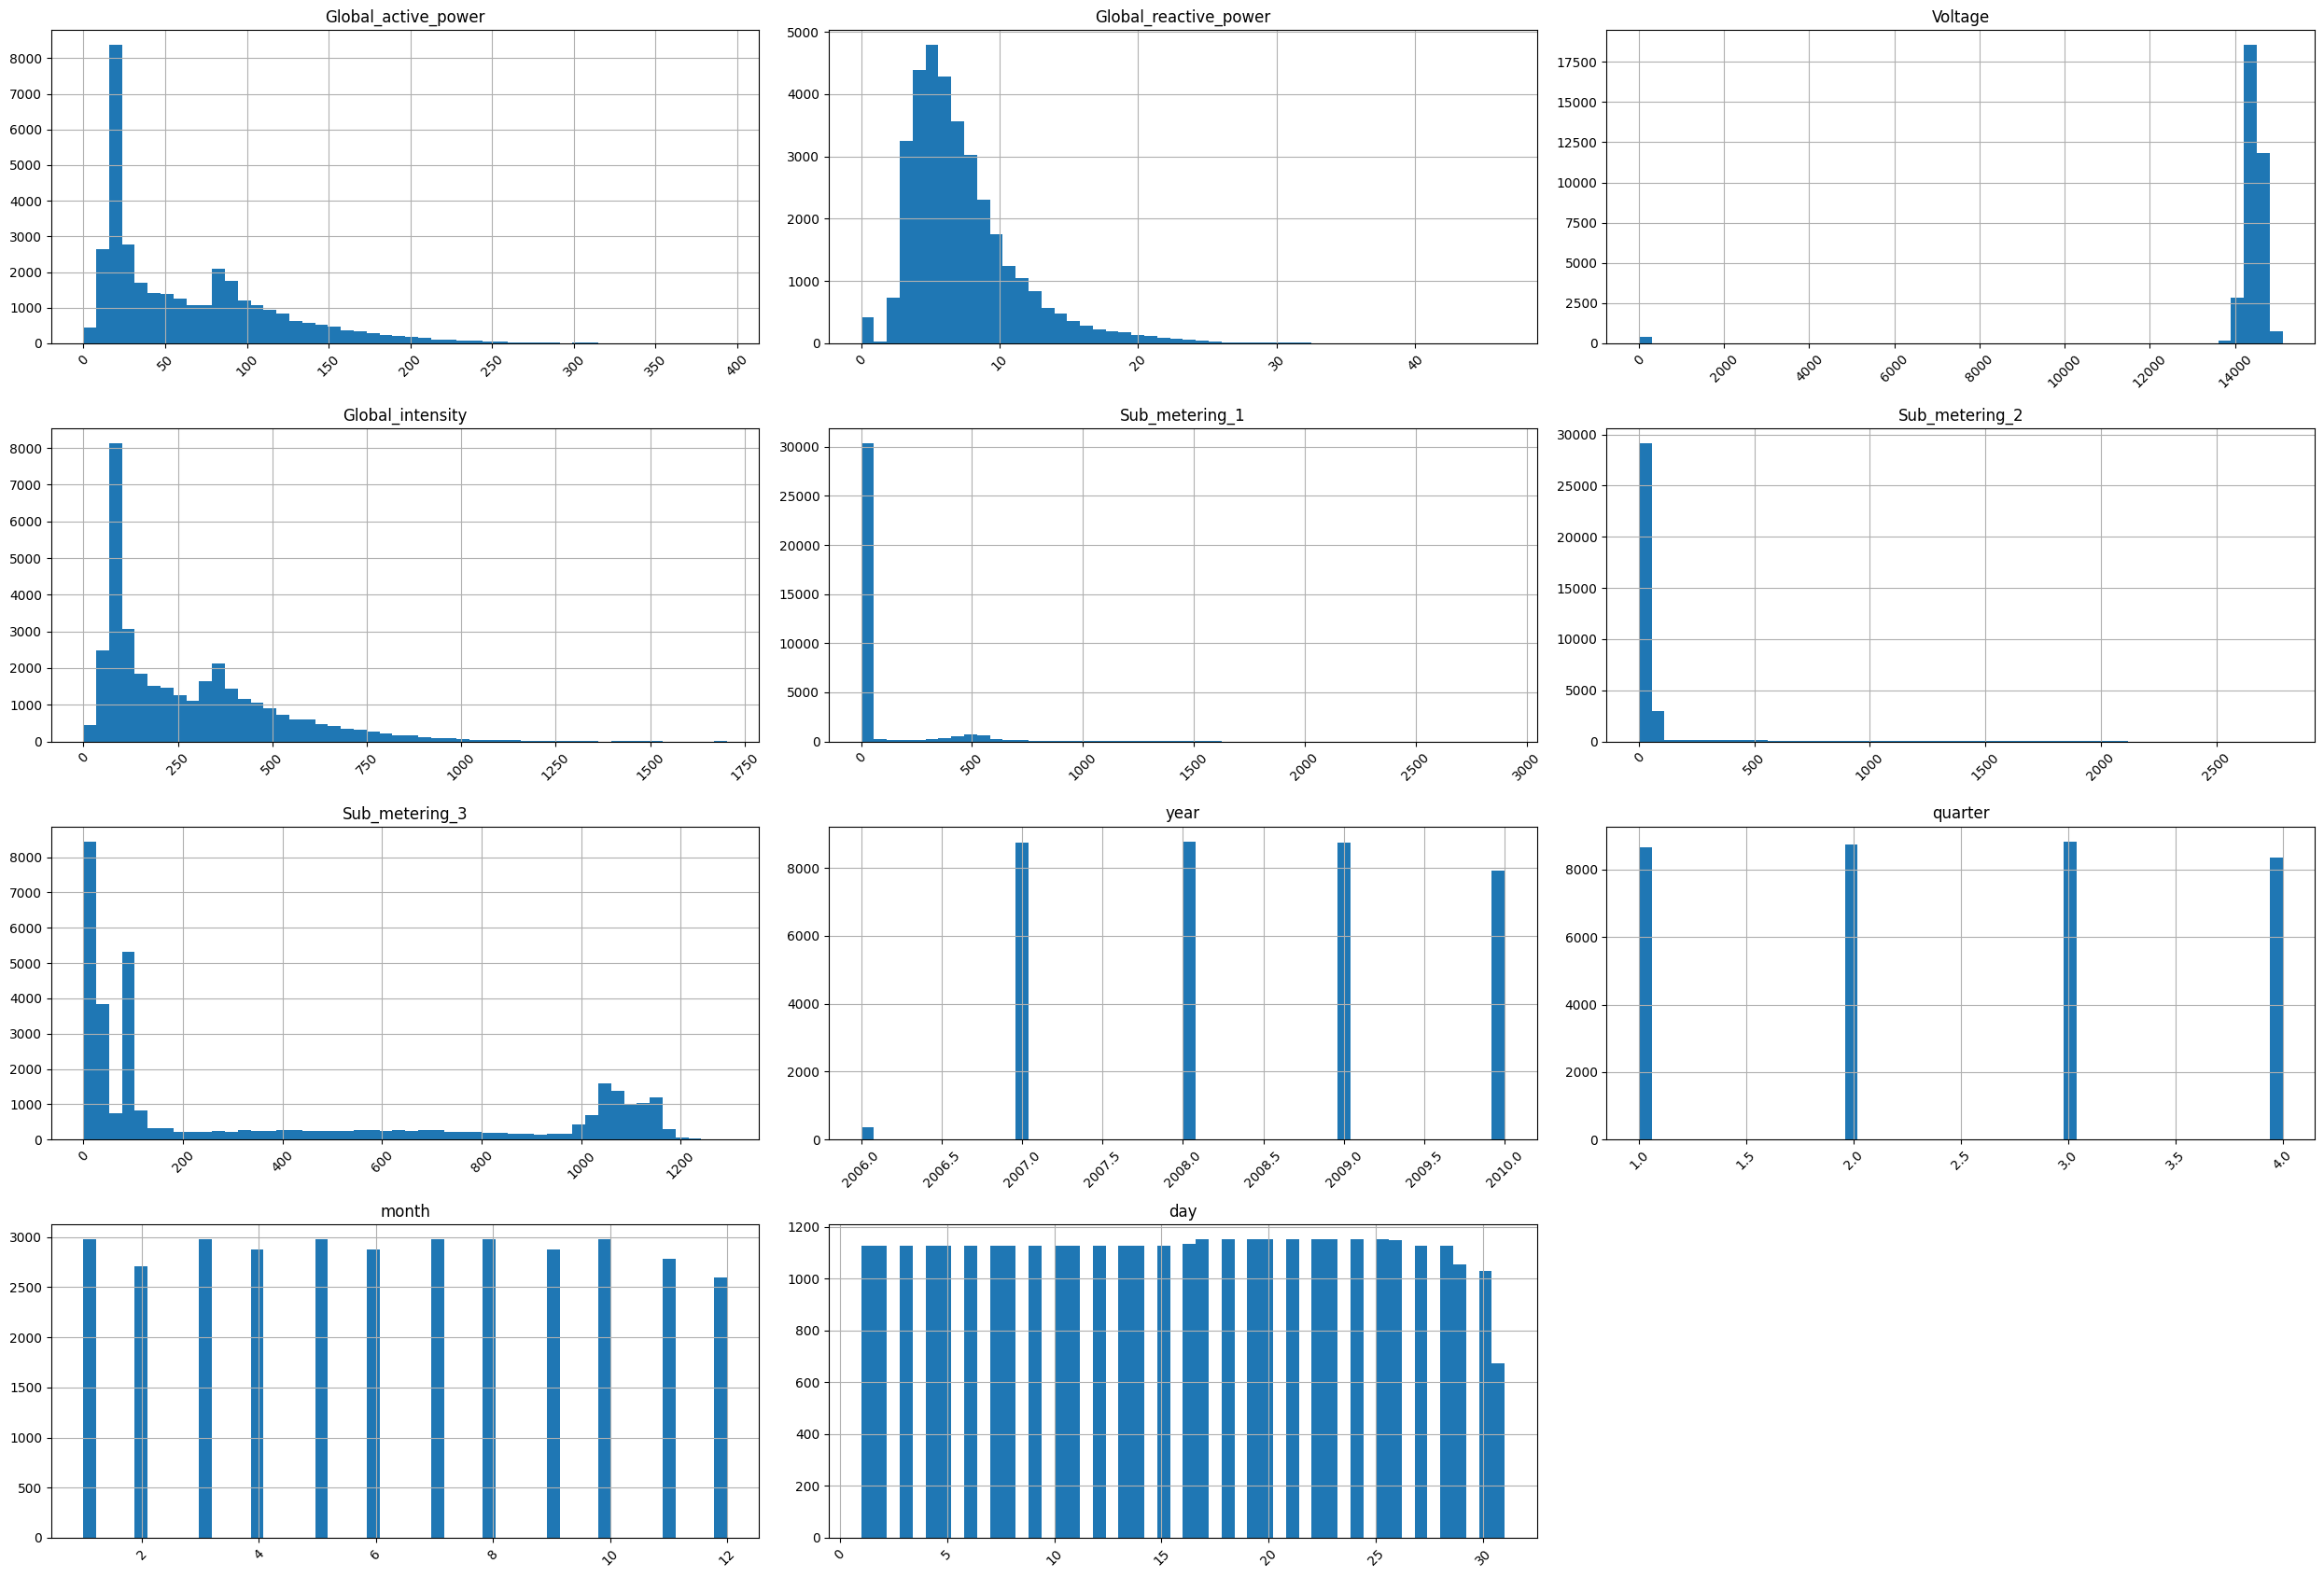

In [20]:
# distributions of features
axes = df.hist(bins=50, figsize=(25,17))

for ax in axes.flatten():
    ax.tick_params(axis="x", rotation=45)
    ax.figure.tight_layout();

In [21]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,quarter,month,day
count,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000
mean,64.674459,7.329660,14268.938222,274.178918,66.470121,76.932869,382.640926,2008.436613,2.488074,6.450548,15.773917
std,53.995513,4.066808,1608.365811,226.097083,211.089850,250.148948,440.306805,1.128731,1.110891,3.415879,8.787890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,1.000000,1.000000,1.000000
25%,20.218000,4.618000,14344.730000,89.400000,0.000000,0.000000,38.000000,2007.000000,1.000000,3.000000,8.000000
50%,46.948000,6.364000,14455.770000,200.400000,0.000000,19.000000,99.000000,2008.000000,2.000000,6.000000,16.000000
75%,94.206000,8.920000,14560.290000,393.800000,0.000000,39.000000,837.000000,2009.000000,3.000000,9.000000,23.000000
max,393.632000,46.460000,15114.120000,1703.000000,2902.000000,2786.000000,1293.000000,2010.000000,4.000000,12.000000,31.000000


In [22]:
skewness = df.skew()

print(skewness)
print("========================================================================")
# Conclude based on skewness values
for column, skew_val in skewness.items():
    if skew_val > 0:
        print(f"The skewness of column '{column}' is {skew_val:.3f}: right-skewed.")
    elif skew_val < 0:
        print(f"The skewness of column '{column}' is {skew_val:.3f}: left-skewed.")
    else:
        print(f"The skewness of column '{column}' is {skew_val:.3f}: symmetric.")

Global_active_power      1.293752
Global_reactive_power    1.766338
Voltage                 -8.606458
Global_intensity         1.344571
Sub_metering_1           4.289611
Sub_metering_2           5.306160
Sub_metering_3           0.730237
year                    -0.003832
quarter                  0.010610
month                    0.002572
day                     -0.003319
dtype: float64
The skewness of column 'Global_active_power' is 1.294: right-skewed.
The skewness of column 'Global_reactive_power' is 1.766: right-skewed.
The skewness of column 'Voltage' is -8.606: left-skewed.
The skewness of column 'Global_intensity' is 1.345: right-skewed.
The skewness of column 'Sub_metering_1' is 4.290: right-skewed.
The skewness of column 'Sub_metering_2' is 5.306: right-skewed.
The skewness of column 'Sub_metering_3' is 0.730: right-skewed.
The skewness of column 'year' is -0.004: left-skewed.
The skewness of column 'quarter' is 0.011: right-skewed.
The skewness of column 'month' is 0.003: righ

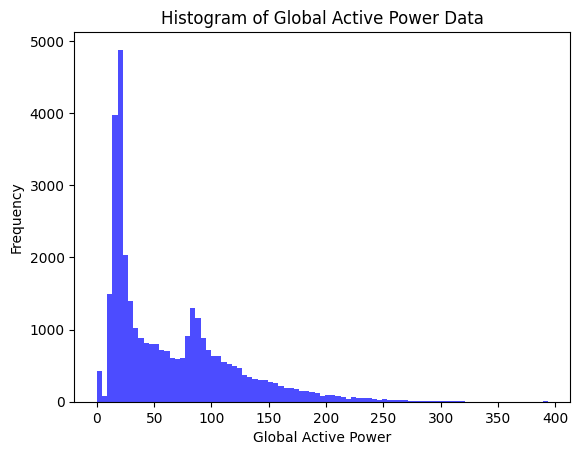

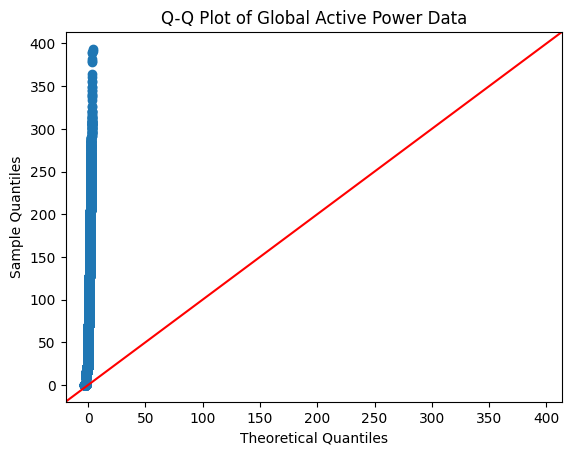

In [23]:
# Histogram
plt.hist(df['Global_active_power'], bins='auto', color='blue', alpha=0.7)
plt.title('Histogram of Global Active Power Data')
plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
import statsmodels.api as sm
sm.qqplot(df['Global_active_power'], line ='45')
plt.title('Q-Q Plot of Global Active Power Data')
plt.show()

The skewness of column 'Global_active_power' is not normally distributed and right-skewed.

In [24]:
def get_season(month): # season (1:spring, 2:summer, 3:fall, 4:winter)
    if 3 <= month <= 5:
        return 1  # Spring
    elif 6 <= month <= 8:
        return 2  # Summer
    elif 9 <= month <= 11:
        return 3  # Fall
    else:
        return 4  # Winter

In [25]:
df['Time_of_day'] = df.index.hour # time features
day_mapping = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7} # dictionary to map day of the week values
df['Day_of_week'] = df.index.dayofweek.map(day_mapping) # day of Week: Monday-Sunday
df['Season'] = df.index.month.map(get_season) # season

In [26]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,quarter,month,day,Time_of_day,Day_of_week,Season
DateTime,,,,,,,,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0,2006,4,12,16,17,6,4
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0,2006,4,12,16,18,6,4
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0,2006,4,12,16,19,6,4
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0,2006,4,12,16,20,6,4
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0,2006,4,12,16,21,6,4


In [27]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'year', 'quarter', 'month', 'day', 'Time_of_day',
       'Day_of_week', 'Season'],
      dtype='object')

In [28]:
df.drop(columns=['Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'], inplace=True) # drop columns not needed for time series analysis and model to predict Global Active Power

In [29]:
df.head()

,Global_active_power,year,quarter,month,day,Time_of_day,Day_of_week,Season
DateTime,,,,,,,,
2006-12-16 17:00:00,152.024,2006,4,12,16,17,6,4
2006-12-16 18:00:00,217.932,2006,4,12,16,18,6,4
2006-12-16 19:00:00,204.014,2006,4,12,16,19,6,4
2006-12-16 20:00:00,196.114,2006,4,12,16,20,6,4
2006-12-16 21:00:00,183.388,2006,4,12,16,21,6,4


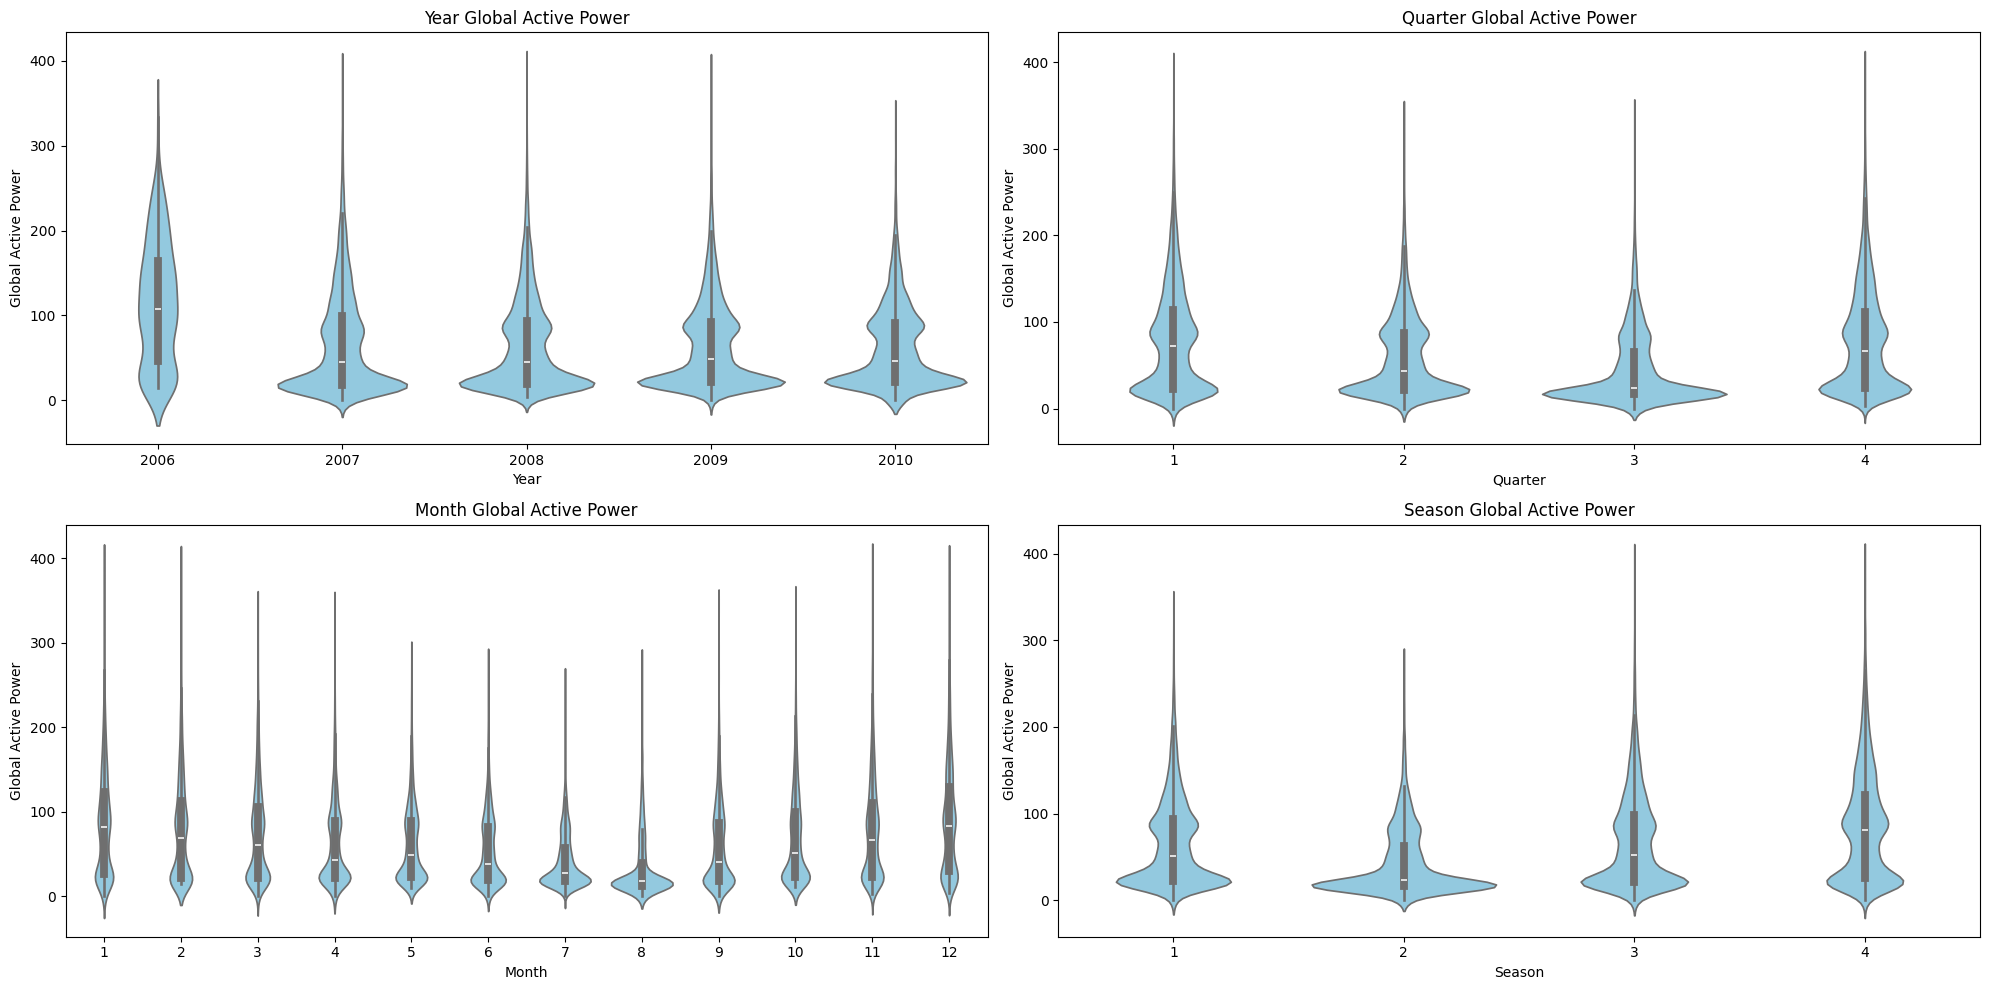

In [30]:
features = ['year', 'quarter', 'month', 'Season'] # features to plot

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.violinplot(x=df[feature], y=df['Global_active_power'], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature.capitalize()} Global Active Power')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Global Active Power')

plt.tight_layout()
plt.show()


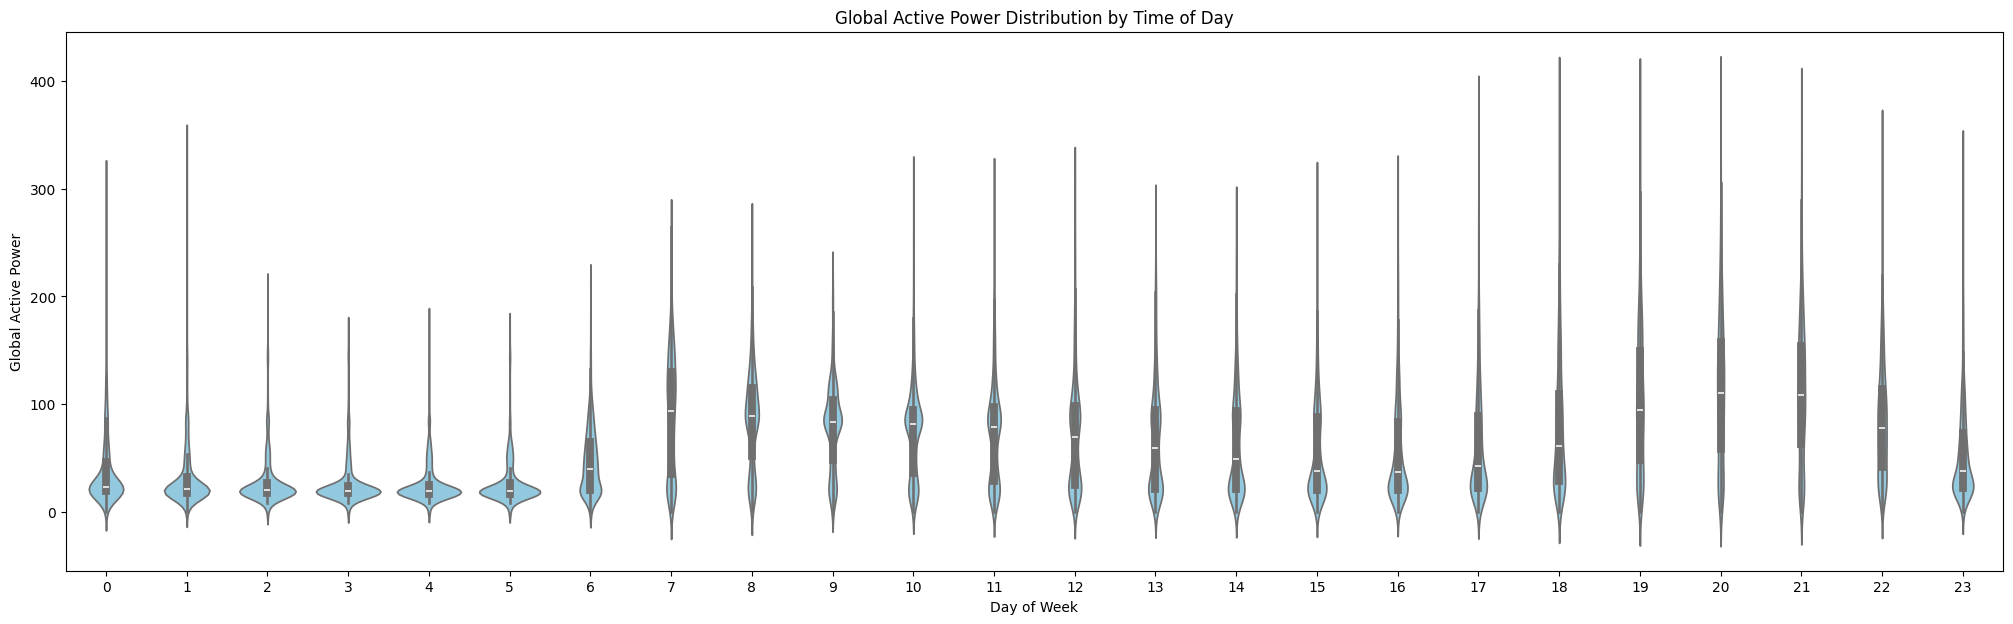

In [31]:
plt.figure(figsize=(25, 7))
sns.violinplot(x=df['Time_of_day'], y=df['Global_active_power'], color='skyblue')
plt.title('Global Active Power Distribution by Time of Day')
plt.xlabel('Day of Week')
plt.ylabel('Global Active Power')
plt.show()

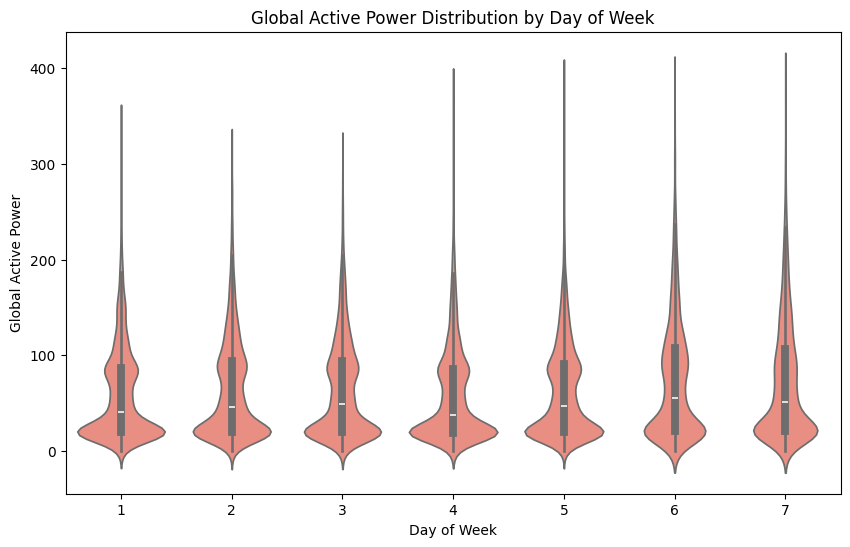

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Day_of_week'], y=df['Global_active_power'], color='salmon')
plt.title('Global Active Power Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Global Active Power')
plt.show()

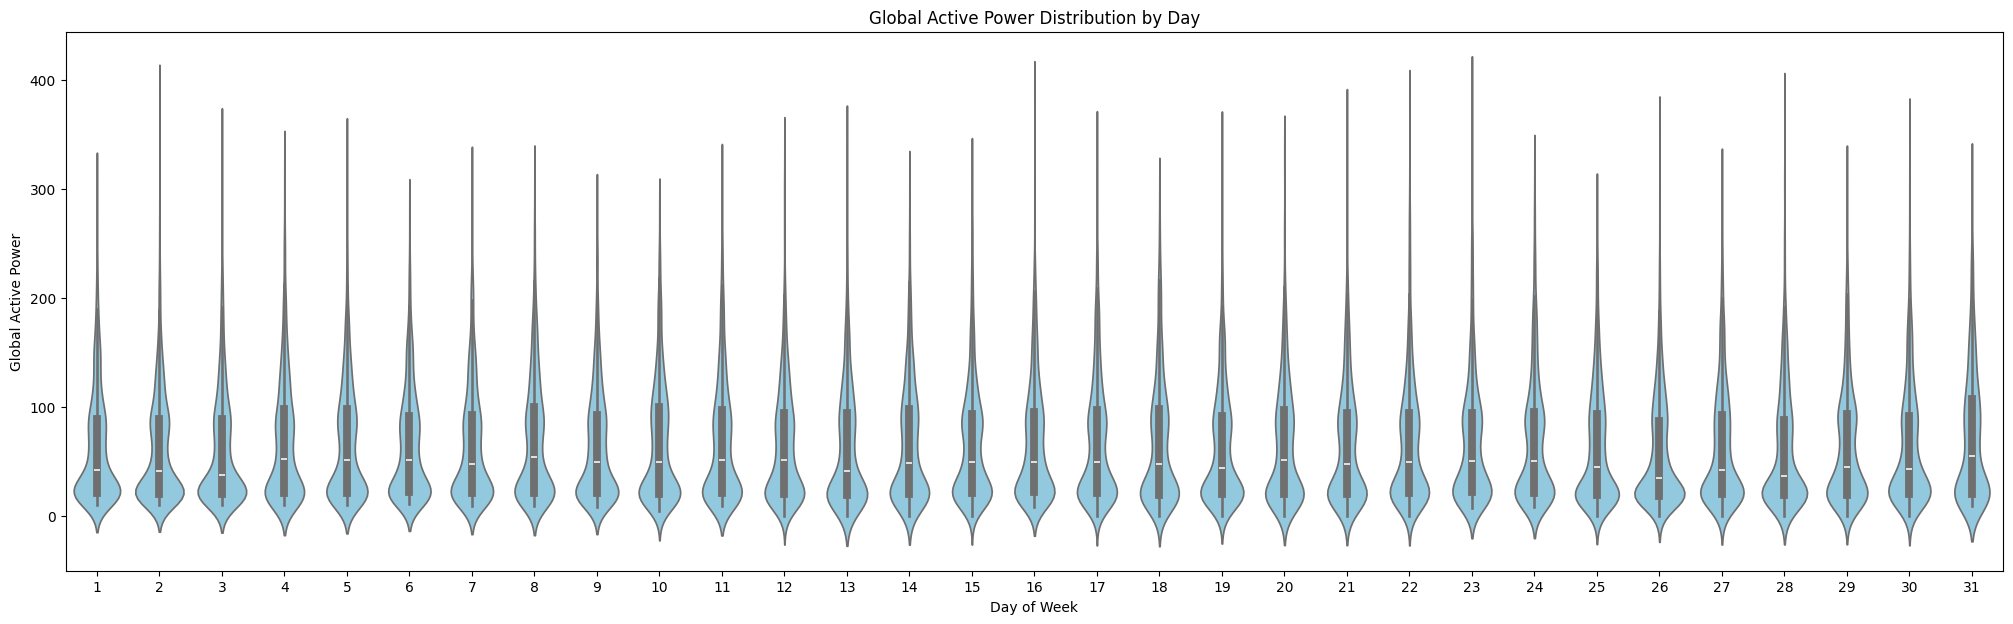

In [33]:
plt.figure(figsize=(25, 7))
sns.violinplot(x=df['day'], y=df['Global_active_power'], color='skyblue')
plt.title('Global Active Power Distribution by Day')
plt.xlabel('Day of Week')
plt.ylabel('Global Active Power')
plt.show()

**Interpretation Violin Plots:**
- The violin plot for the year global active power shows a higher median for 2006 compare 2007, 2008, 2009, and 2010. This is misleading because the datasets containts only data of december for 2006. The amount of electricity used in homes can increase in December.

- The quarter violin plot shows that the median energy consumption for household is higher in the spring and winter, follow by the summer, and then the winter. In spring and winter, households use more energy for heating, making their energy consumption higher. Summer comes next, as air conditioning use increases, but it might not surpass spring and winter levels. Fall sees a decrease in energy use as temperatures moderate.

- The monthly violin plot shows that the median energy consumption for household is higher in November, December, January, and February, likely due to increased heating needs during colder months.

- The hourly violin plot shows that the median energy consumption for household is higher between 7am and 11 am, and between 7pm and 10pm. Higher median energy consumption for households between 7am-11am and 7pm-10pm is likely due to increased activity during morning routines and evening activities, including cooking, heating, and lighting.

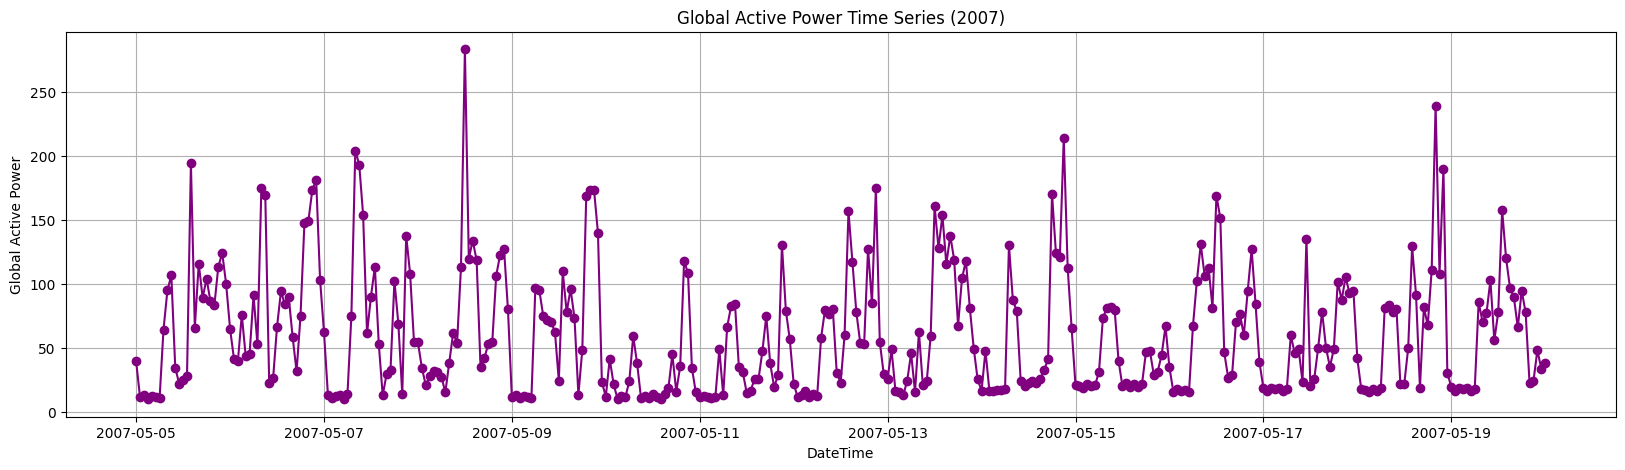

In [34]:
# filter data for the year 2007
start_date = pd.Timestamp('2007-05-05')
end_date = pd.Timestamp('2007-05-20')
df_2007 = df[(df.index >= start_date) & (df.index <= end_date)]

plt.figure(figsize=(20, 5))
plt.plot(df_2007.index, df_2007['Global_active_power'], marker='o', linestyle='-', color='purple')
plt.title('Global Active Power Time Series (2007)')
plt.xlabel('DateTime')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

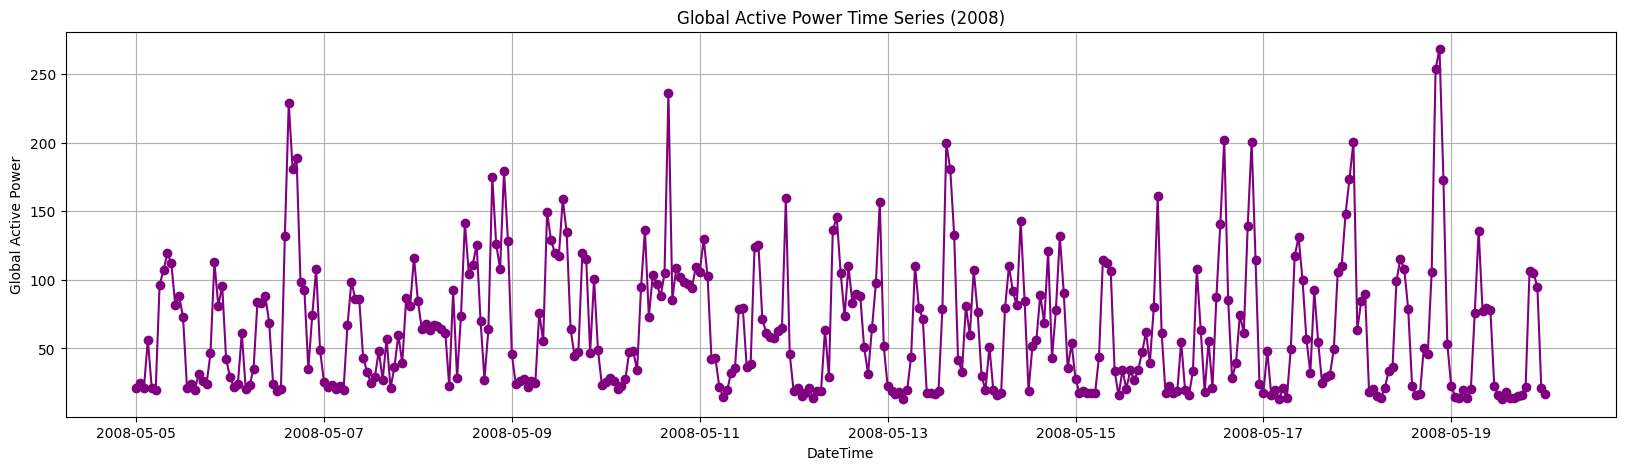

In [35]:
# filter data for the year 2008
start_date = pd.Timestamp('2008-05-05')
end_date = pd.Timestamp('2008-05-20')
df_2008 = df[(df.index >= start_date) & (df.index <= end_date)]

plt.figure(figsize=(20, 5))
plt.plot(df_2008.index, df_2008['Global_active_power'], marker='o', linestyle='-', color='purple')
plt.title('Global Active Power Time Series (2008)')
plt.xlabel('DateTime')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

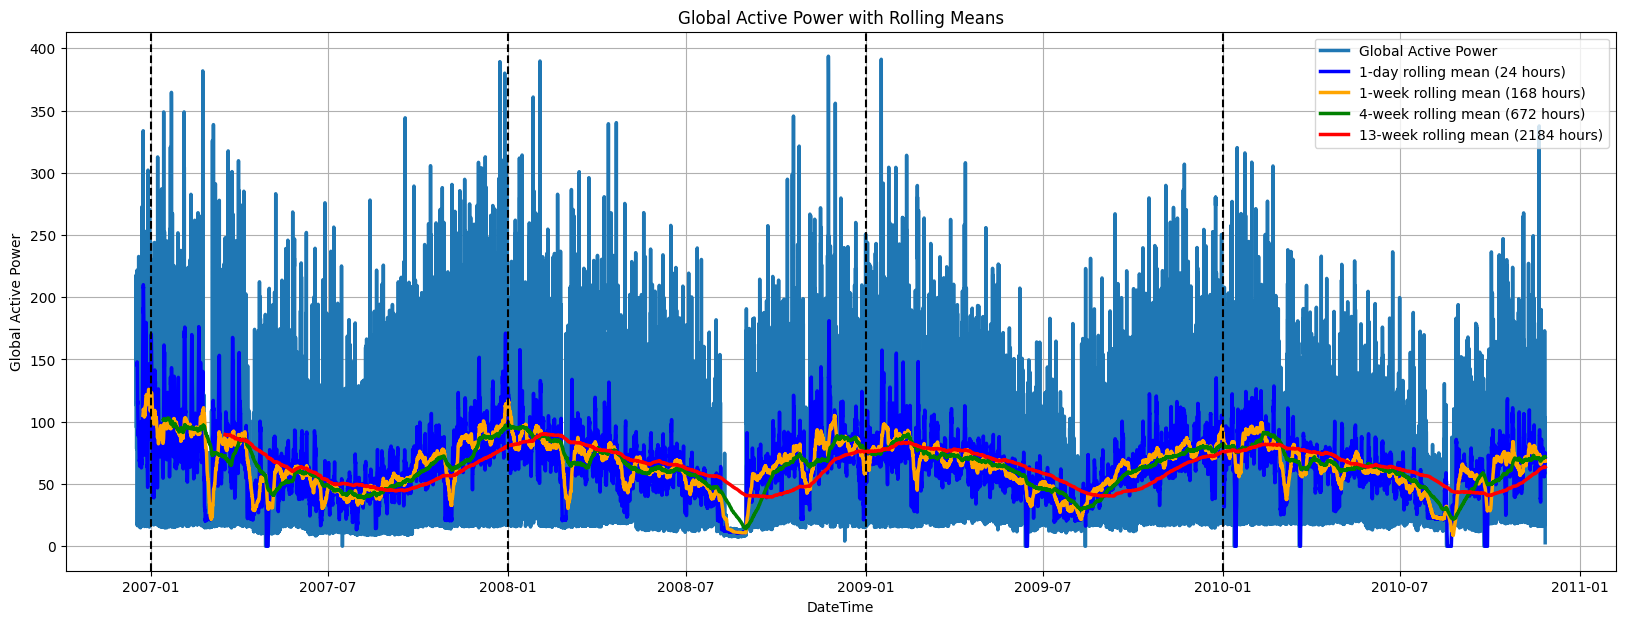

In [36]:
plt.figure(figsize=(20, 7))

# original 'Global_active_power' series
plt.plot(df.index, df['Global_active_power'], label='Global Active Power', linewidth=2.5)

# rolling means
plt.plot(df.index, df['Global_active_power'].rolling(window=24).mean(), label='1-day rolling mean (24 hours)', color='blue', linewidth=2.5)
plt.plot(df.index, df['Global_active_power'].rolling(window=168).mean(), label='1-week rolling mean (168 hours)', color='orange', linewidth=2.5)
plt.plot(df.index, df['Global_active_power'].rolling(window=4*168).mean(), label='4-week rolling mean (672 hours)', color='green', linewidth=2.5)
plt.plot(df.index, df['Global_active_power'].rolling(window=13*168).mean(), label='13-week rolling mean (2184 hours)', color='red', linewidth=2.5)

# Vertical lines for each year
plt.axvline(pd.to_datetime('2007-01-01'), color='black', linestyle='dashed')
plt.axvline(pd.to_datetime('2008-01-01'), color='black', linestyle='dashed')
plt.axvline(pd.to_datetime('2009-01-01'), color='black', linestyle='dashed')
plt.axvline(pd.to_datetime('2010-01-01'), color='black', linestyle='dashed')

plt.title('Global Active Power with Rolling Means')
plt.xlabel('DateTime')
plt.ylabel('Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

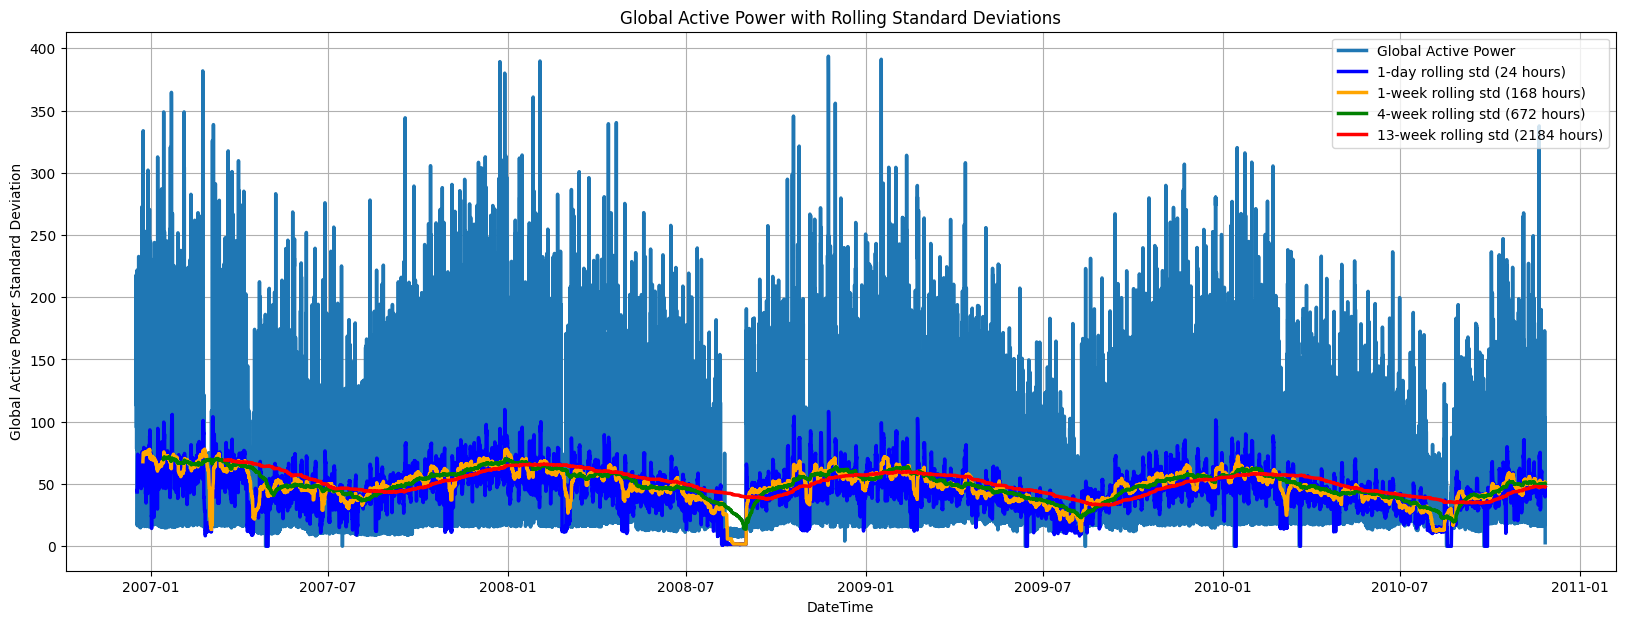

In [37]:
plt.figure(figsize=(20, 7))

# original 'Global_active_power' series
plt.plot(df.index, df['Global_active_power'], label='Global Active Power', linewidth=2.5)

# rolling standard deviations
plt.plot(df.index, df['Global_active_power'].rolling(window=24).std(), label='1-day rolling std (24 hours)', color='blue', linewidth=2.5)
plt.plot(df.index, df['Global_active_power'].rolling(window=168).std(), label='1-week rolling std (168 hours)', color='orange', linewidth=2.5)
plt.plot(df.index, df['Global_active_power'].rolling(window=4*168).std(), label='4-week rolling std (672 hours)', color='green', linewidth=2.5)
plt.plot(df.index, df['Global_active_power'].rolling(window=13*168).std(), label='13-week rolling std (2184 hours)', color='red', linewidth=2.5)

plt.title('Global Active Power with Rolling Standard Deviations')
plt.xlabel('DateTime')
plt.ylabel('Global Active Power Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

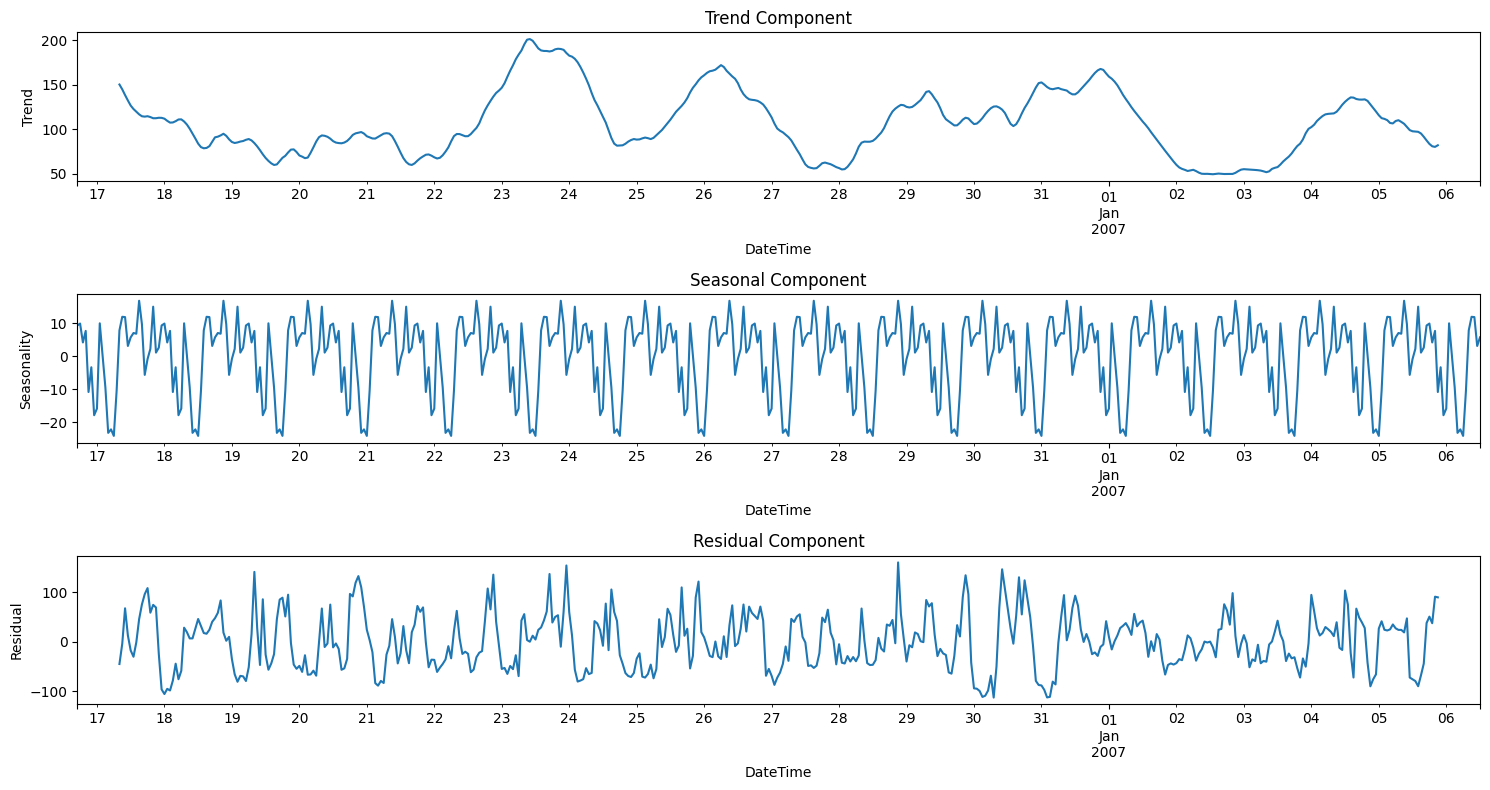

In [38]:
# decompose the time series using an additive model
decomposition_results = seasonal_decompose(df["Global_active_power"].iloc[:500], model="additive", period=30) # for 500 rows of data

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8))

# trend component
decomposition_results.trend.plot(ax=ax1, ylabel="Trend", title="Trend Component")

# seasonal component
decomposition_results.seasonal.plot(ax=ax2, ylabel="Seasonality", title="Seasonal Component")

# decomposition_resultsidual component
decomposition_results.resid.plot(ax=ax3, ylabel="Residual", title="Residual Component")

plt.tight_layout()
plt.show()

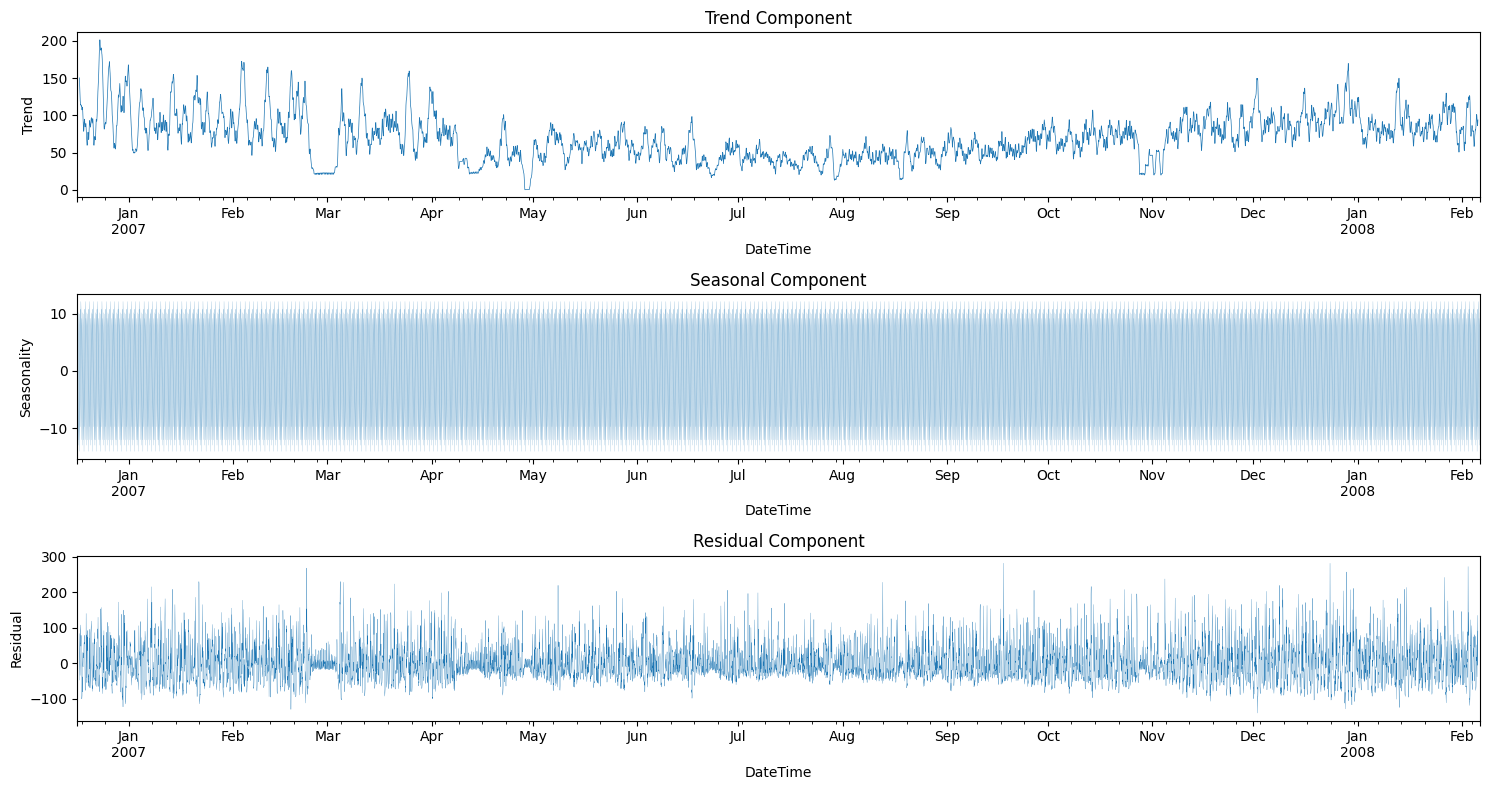

In [69]:
# decompose the time series using an additive model
decomposition_results = seasonal_decompose(df["Global_active_power"].iloc[:10000], model="additive", period=30) # for 10,000 rows of data

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8))

# trend component
decomposition_results.trend.plot(ax=ax1, ylabel="Trend", title="Trend Component", linewidth=0.5)

# seasonal component
decomposition_results.seasonal.plot(ax=ax2, ylabel="Seasonality", title="Seasonal Component", linewidth=0.1)

# residual component
decomposition_results.resid.plot(ax=ax3, ylabel="Residual", title="Residual Component", linewidth=0.2)

plt.tight_layout()
plt.show()

In [62]:
result = adfuller(df['Global_active_power'])
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('test Statistic:', test_statistic),print("")
print('p-value:', p_value),print("")
print('Critical Values:')
for key, value in critical_values.items():
    print('\t%s: %.3f' % (key, value))
print("")
if p_value < 0.05:
    print("p-value is less than 0.05. Reject the null hypothesis.")
    print("The data is likely stationary.")
else:
    print("p-value is greater than or equal to 0.05. Fail to reject the null hypothesis.")
    print("The data is likely non-stationary.")

test Statistic: -14.31429879744085

p-value: 1.1699900825176093e-26

Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

p-value is less than 0.05. Reject the null hypothesis.
The data is likely stationary.


 The data is stationary, and its statistical properties do not change over time, so the data is not time dependent.

 LSTM models can handle both stationary and non-stationary data.

 ARIMA models require stationary data, so the data is well-suited for ARIMA modeling.

 Here LSTM will be used, and LSTM can handle non-stationary data and learns dependencies directly from sequences without needing `ACF` and `PACF`.

# Preprocessing, Modeling, and Evaluation

In [40]:
df.columns

Index(['Global_active_power', 'year', 'quarter', 'month', 'day', 'Time_of_day',
       'Day_of_week', 'Season'],
      dtype='object')

In [41]:
df = df.drop(columns=['year', 'quarter', 'month', 'day', 'Time_of_day',
       'Day_of_week', 'Season'])
df.head()

,Global_active_power
DateTime,
2006-12-16 17:00:00,152.024
2006-12-16 18:00:00,217.932
2006-12-16 19:00:00,204.014
2006-12-16 20:00:00,196.114
2006-12-16 21:00:00,183.388


In [42]:
df.shape

(34589, 1)

# LSTM (Long Short-Term Memory) MODEL

In [43]:
# preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# split data into training and testing sets
train_size = int(len(scaled_data) * 0.9)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [44]:
time_step = 50
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

In [45]:
X_train.shape

(31079, 50)

In [46]:
X_test.shape

(3408, 50)

In [47]:
# input shape - [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [48]:
# LSTM model with dropout
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))


In [49]:
model.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4)

In [50]:
# train model
history = model.fit(X_train, y_train, epochs=100, batch_size=1240, validation_data=(X_test, y_test),
          callbacks=[early_stopping], verbose=1, shuffle=False)

Epoch 1/100
26/26 [==============================] - 11s 306ms/step - loss: 0.0237 - val_loss: 0.0119
Epoch 2/100
26/26 [==============================] - 7s 270ms/step - loss: 0.0181 - val_loss: 0.0113
Epoch 3/100
26/26 [==============================] - 7s 264ms/step - loss: 0.0173 - val_loss: 0.0108
Epoch 4/100
26/26 [==============================] - 7s 269ms/step - loss: 0.0167 - val_loss: 0.0103
Epoch 5/100
26/26 [==============================] - 7s 272ms/step - loss: 0.0158 - val_loss: 0.0096
Epoch 6/100
26/26 [==============================] - 7s 273ms/step - loss: 0.0146 - val_loss: 0.0087
Epoch 7/100
26/26 [==============================] - 7s 272ms/step - loss: 0.0133 - val_loss: 0.0080
Epoch 8/100
26/26 [==============================] - 7s 263ms/step - loss: 0.0122 - val_loss: 0.0074
Epoch 9/100
26/26 [==============================] - 7s 274ms/step - loss: 0.0113 - val_loss: 0.0069
Epoch 10/100
26/26 [==============================] - 7s 269ms/step - loss: 0.0106 - val_l

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 

In [52]:
 # predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

107/107 [==============================] - 1s 12ms/step


In [53]:
# inverse transform to get actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [54]:
train_y = scaler.inverse_transform([y_train])
test_y = scaler.inverse_transform([y_test])

In [55]:
# MAE and MSE
mae_train_lstm = mean_absolute_error(train_y[0], train_predict[:, 0])
mae_test_lstm = mean_absolute_error(test_y[0], test_predict[:, 0])
mse_train_lstm = mean_squared_error(train_y[0], train_predict[:, 0])
mse_test_lstm = mean_squared_error(test_y[0], test_predict[:, 0])

print(f"Mean Absolute Error (Training Set) [LSTM]: {mae_train_lstm}")
print(f"Mean Absolute Error (Test Set) [LSTM]: {mae_test_lstm}")
print("=================================================================")
print(f"Mean Squared Error (Training Set) [LSTM]: {mse_train_lstm}")
print(f"Mean Squared Error (Test Set) [LSTM]: {mse_test_lstm}")

Mean Absolute Error (Training Set) [LSTM]: 25.260553102027238
Mean Absolute Error (Test Set) [LSTM]: 20.896655805742235
Mean Squared Error (Training Set) [LSTM]: 1274.8143366718662
Mean Squared Error (Test Set) [LSTM]: 856.8616207012775


107/107 [==============================] - 1s 12ms/step - loss: 0.0055
Test Loss: 0.005530061665922403


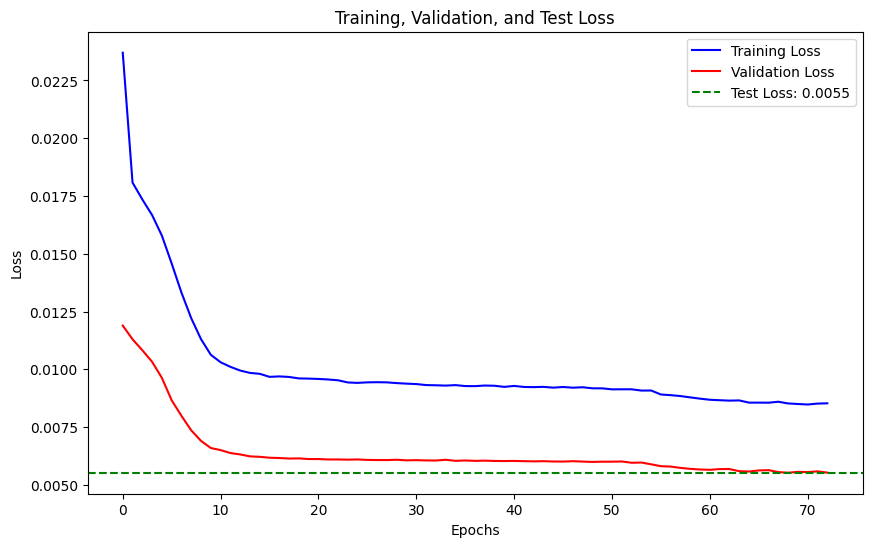

In [56]:
# evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')

# training, validation, and test loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.axhline(y=test_loss, color='green', linestyle='--', label=f'Test Loss: {test_loss:.4f}')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

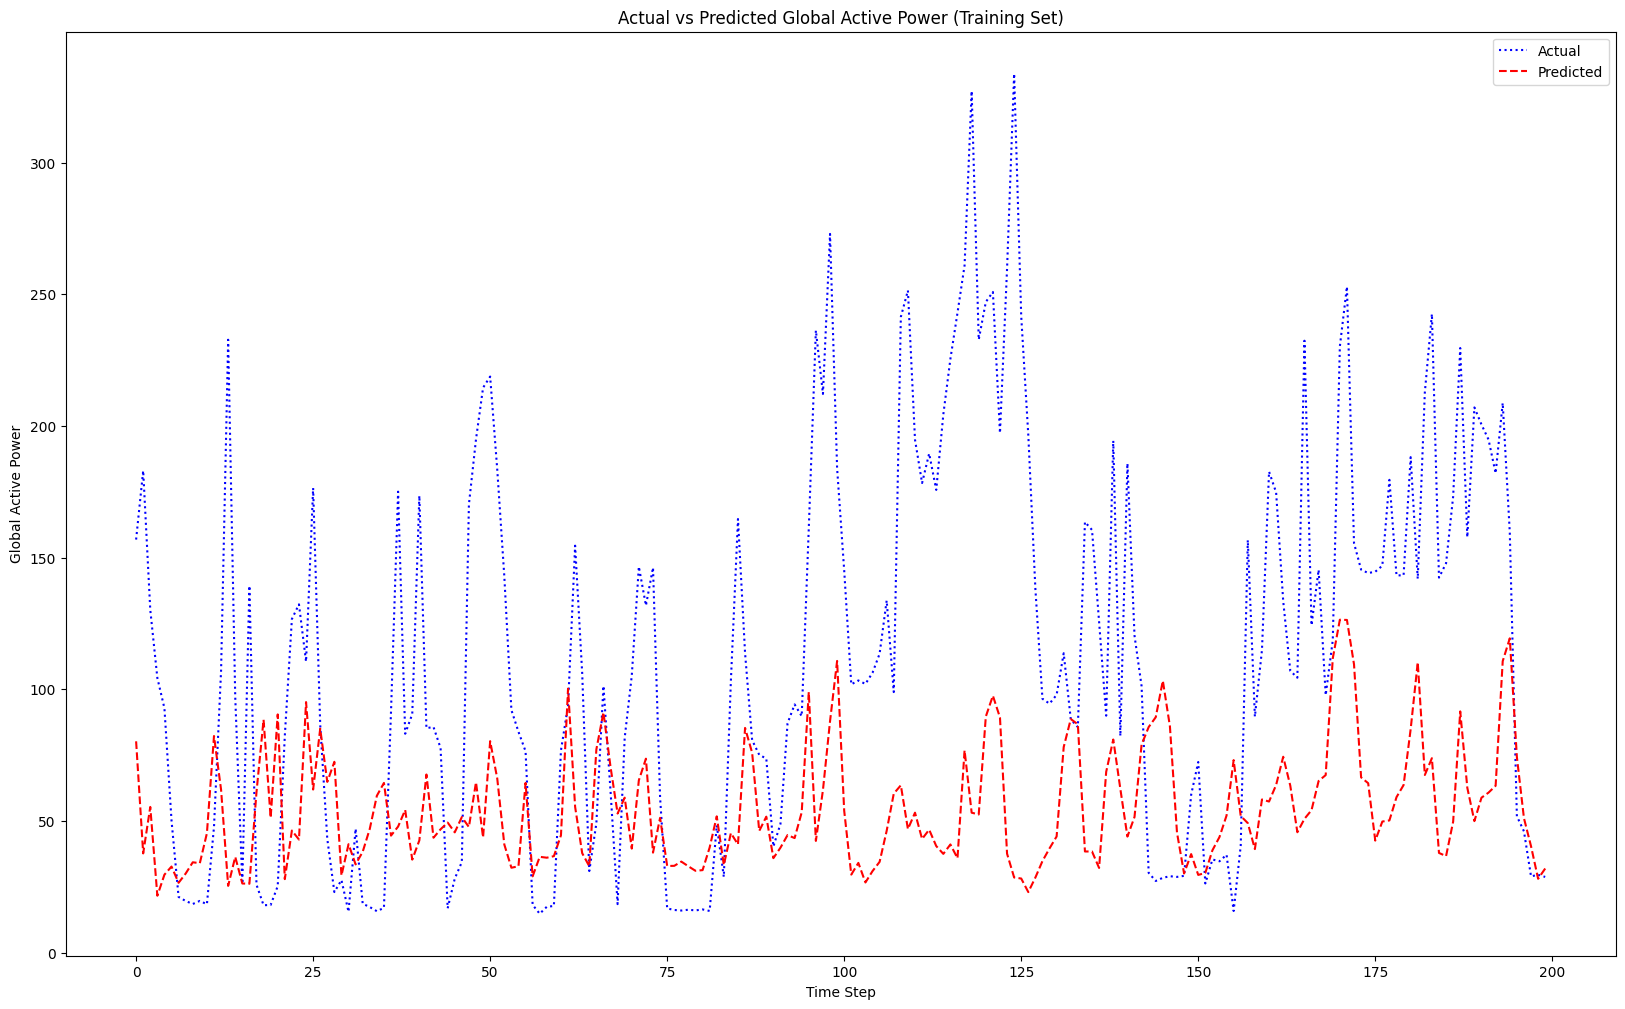

In [57]:
# actual vs predicted values for the first 200 values - Training Set
plt.figure(figsize=(20, 12))
plt.plot(range(200), train_y[0][:200], label='Actual', color='blue', linestyle=':')
plt.plot(range(200), test_predict[:,0][:200], label='Predicted', color='red', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Global Active Power')
plt.title('Actual vs Predicted Global Active Power (Training Set)')
plt.legend()
plt.show()

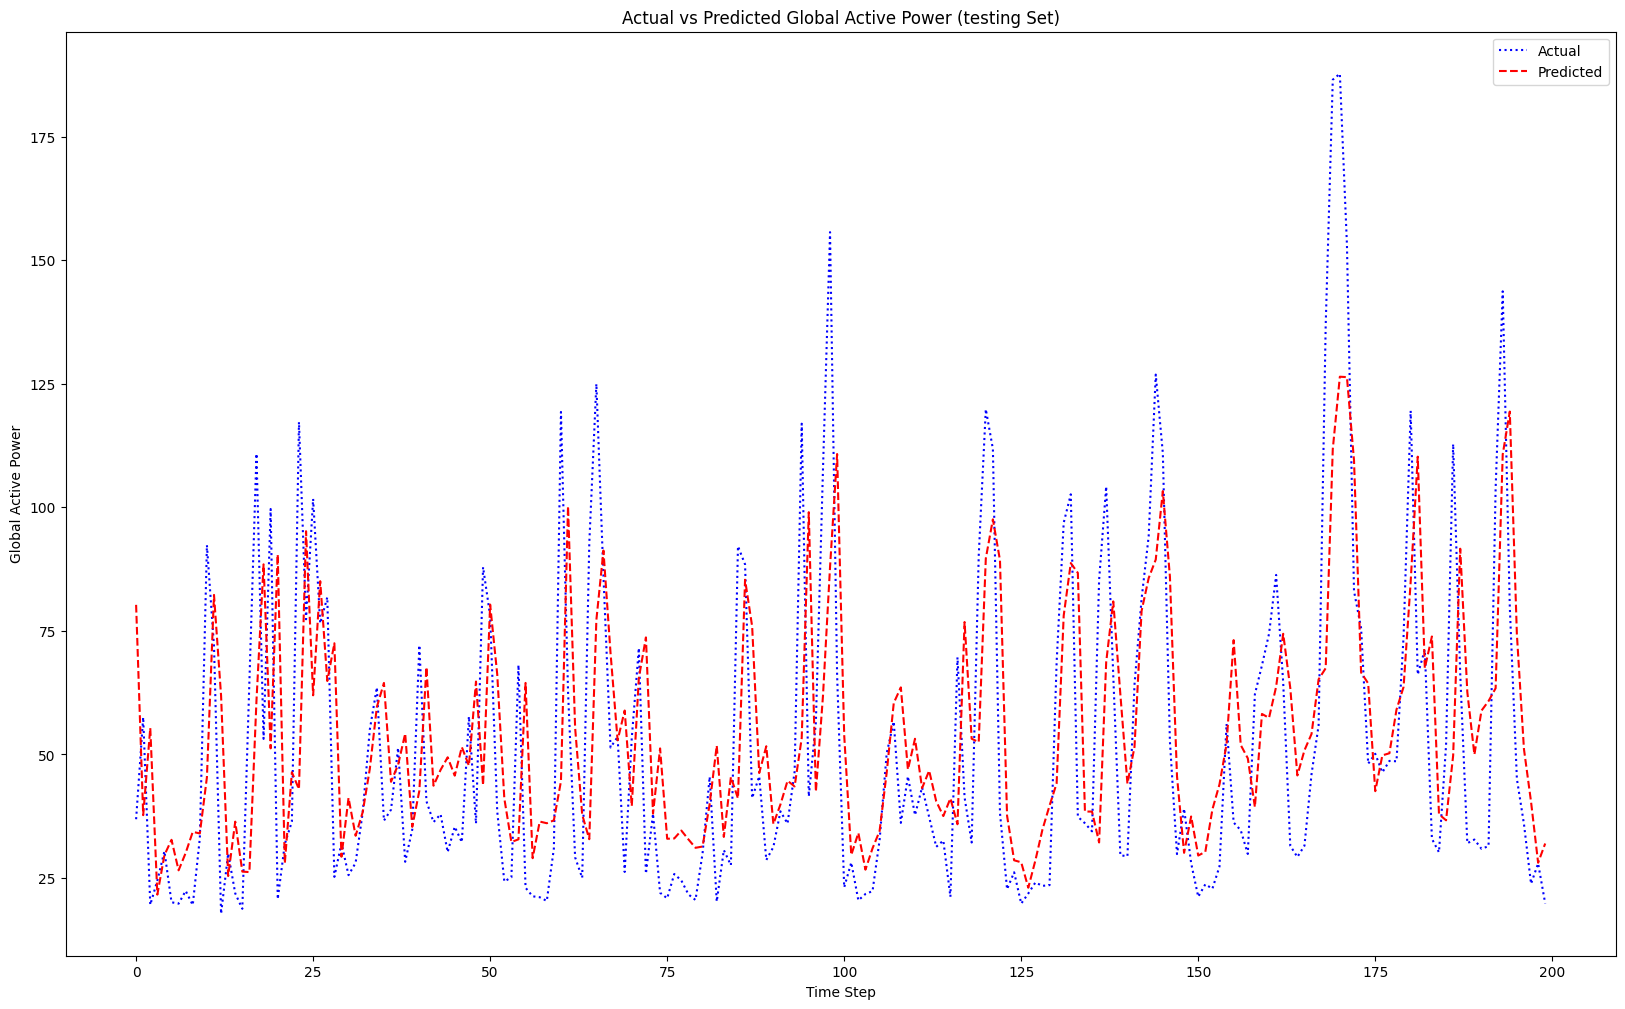

In [58]:
# actual vs predicted values for the first 200 values - testing Set
plt.figure(figsize=(20, 12))
plt.plot(range(200), test_y[0][:200], label='Actual', color='blue', linestyle=':')
plt.plot(range(200), test_predict[:,0][:200], label='Predicted', color='red', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Global Active Power')
plt.title('Actual vs Predicted Global Active Power (testing Set)')
plt.legend()
plt.show()

In [59]:
# Save the model as H5
model.save("/content/drive/MyDrive/Colab Notebooks/lstm_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)

Keras version: 2.15.0
TensorFlow version: 2.15.0


## ARIMA MODELS

<Figure size 2000x500 with 0 Axes>

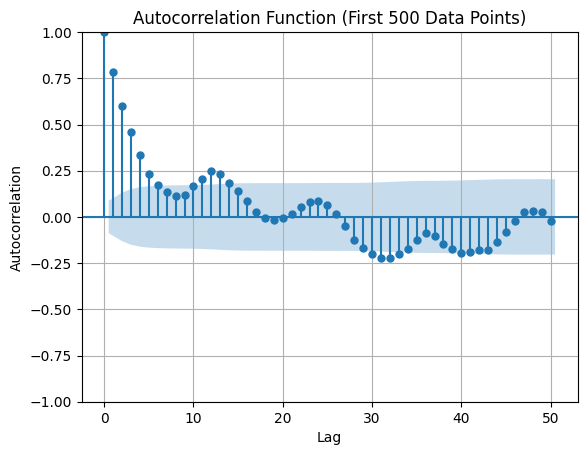

In [ ]:
plt.figure(figsize=(20, 5))

plot_acf(df["Global_active_power"].iloc[:500], lags=50)  # No need to drop NaN values here
plt.title('Autocorrelation Function (First 500 Data Points)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.show()

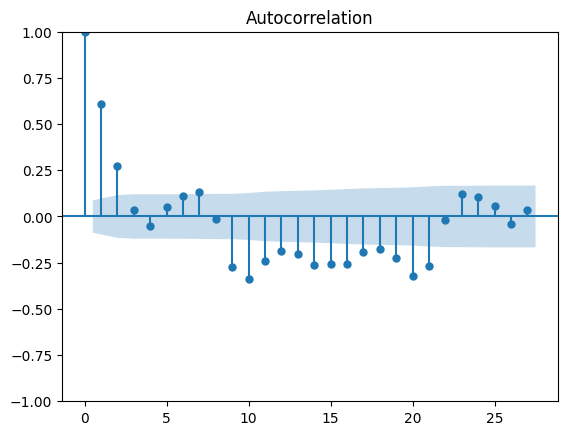

In [61]:
plot_acf(decomposition_results.seasonal)
plt.show()

In [ ]:
train_size = int(len(df) * 0.9)
train_data, test_data = df[:train_size], df[train_size:]

In [ ]:
print(train_data.shape)
print(test_data.shape)

(31130, 1)
(3459, 1)


In [ ]:
train_data

,Global_active_power
DateTime,
2006-12-16 17:00:00,152.024
2006-12-16 18:00:00,217.932
2006-12-16 19:00:00,204.014
2006-12-16 20:00:00,196.114
2006-12-16 21:00:00,183.388
...,...
2010-07-05 14:00:00,76.258
2010-07-05 15:00:00,88.450
2010-07-05 16:00:00,73.218


In [ ]:
arima = ARIMA(endog=train_data, order=(2,0,2))
model = arima.fit()

In [ ]:
train_preds = model.predict(start=train_data.index[0], end=train_data.index[-1])
test_preds = model.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
train_mse = mean_squared_error(train_data, train_preds)
print("Train Mean Squared Error:", train_mse)
test_mse = mean_squared_error(test_data, test_preds)
print("Test Mean Squared Error:", test_mse)

Train Mean Squared Error: 1445.717468378417
Test Mean Squared Error: 2155.496554675754


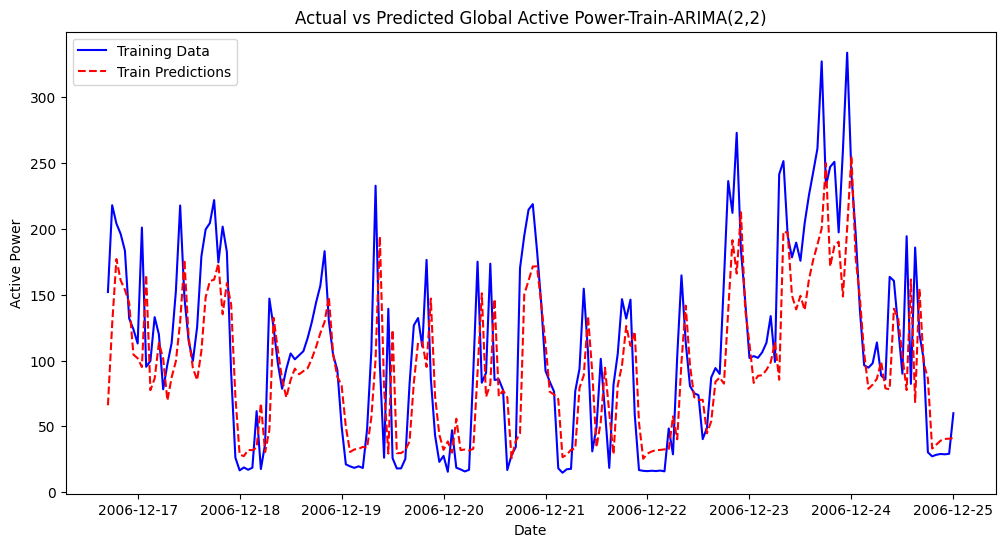

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data[:200], label='Training Data', color='blue') # training data
plt.plot(train_preds[:200], label='Train Predictions', color='red', linestyle='--') # train predictions
plt.title('Actual vs Predicted Global Active Power-Train-ARIMA(2,2)')
plt.xlabel('Date')
plt.ylabel('Active Power')
plt.legend()
plt.show()

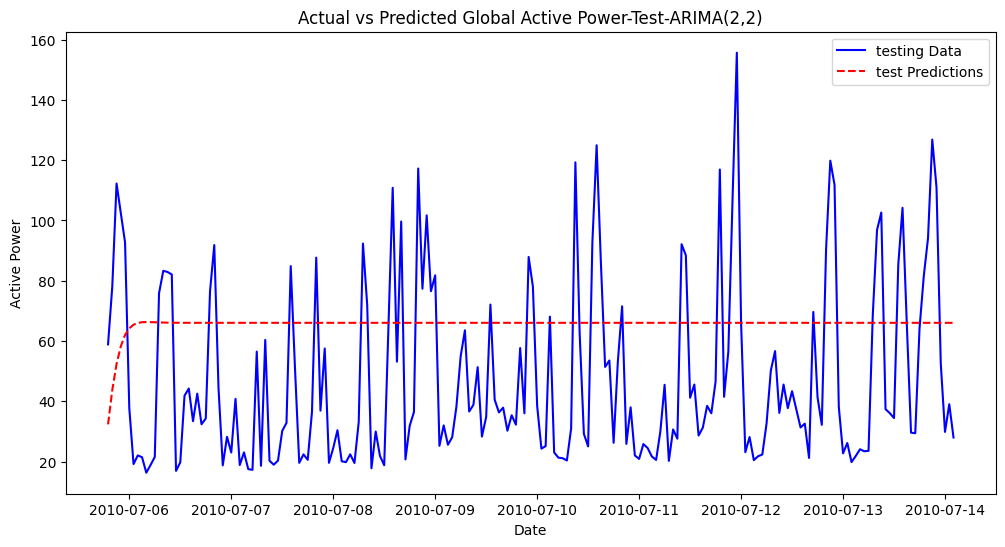

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data[:200], label='testing Data', color='blue') # testing data
plt.plot(test_preds[:200], label='test Predictions', color='red', linestyle='--') # test predictions
plt.title('Actual vs Predicted Global Active Power-Test-ARIMA(2,2)')
plt.xlabel('Date')
plt.ylabel('Active Power')
plt.legend()
plt.show()


In [ ]:
arima = ARIMA(endog=train_data, order=(52,0,1))
model = arima.fit()

In [ ]:
train_preds = model.predict(start=train_data.index[0], end=train_data.index[-1])
test_preds = model.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
train_mse = mean_squared_error(train_data, train_preds)
print("Train Mean Squared Error:", train_mse)
test_mse = mean_squared_error(test_data, test_preds)
print("Test Mean Squared Error:", test_mse)

Train Mean Squared Error: 1253.2049501215754
Test Mean Squared Error: 2141.750625970587


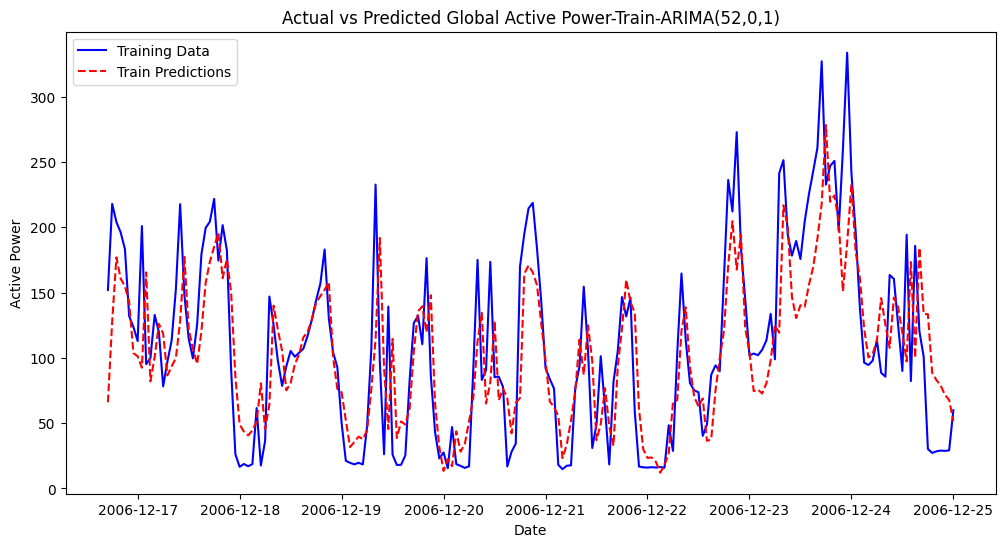

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data[:200], label='Training Data', color='blue') # training data
plt.plot(train_preds[:200], label='Train Predictions', color='red', linestyle='--') # train predictions
plt.title('Actual vs Predicted Global Active Power-Train-ARIMA(52,0,1)')
plt.xlabel('Date')
plt.ylabel('Active Power')
plt.legend()
plt.show()

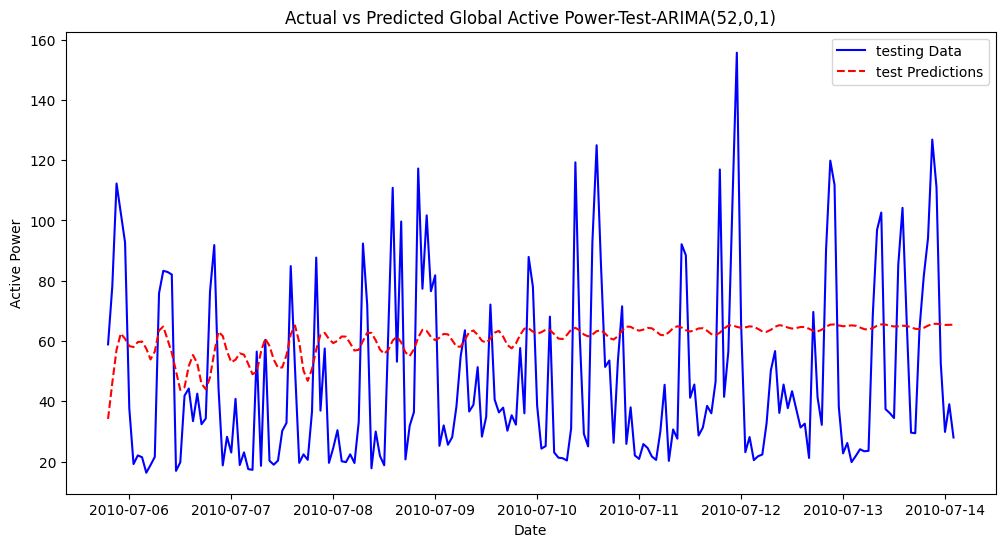

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data[:200], label='testing Data', color='blue') # testing data
plt.plot(test_preds[:200], label='test Predictions', color='red', linestyle='--') # test predictions
plt.title('Actual vs Predicted Global Active Power-Test-ARIMA(52,0,1)')
plt.xlabel('Date')
plt.ylabel('Active Power')
plt.legend()
plt.show()


## Model Comparison

### LSTM Model
- **Mean Absolute Error (Training and Test):** 25.45 for train set, and 21.06 for test set
- **Mean Squared Error (Training and Test):** 1283.30 for train set and 868.10 for test set

The LSTM model has the same performance on both the training and test sets, indicating it's good at generalizing and predicts well overall.

### ARIMA (2,0,2)
- **Training MSE:** 1445.72
- **Test MSE:** 2155.50

This ARIMA model performs worse on the test set compared to the training set, suggesting it might not generalize well and could be overfitting the training data.

### ARIMA (52,0,1)
- **Training MSE:** 1253.20
- **Test MSE:** 2141.75

This ARIMA model is slightly better than the (2,0,2) version on both the training and test sets but still shows a significant difference between training and test errors, indicating some overfitting.

### Summary
- The **LSTM model** has the lowest errors and consistent performance, making it the best at generalizing predictions.
- The **ARIMA (2,0,2)** and **ARIMA (52,0,1)** models show higher test errors, indicating they don't predict as well on new data. The (52,0,1) model is slightly better than the (2,0,2) version but still not as good as the LSTM.

Overall, the LSTM model is the most reliable for predicting household energy consumption.

# Conclusion and Recommendations

## Conclusions

* Accurately predicting household energy consumption is important for both utility companies and households to manage energy efficiently.
* The LSTM (time_step=50) model outperformed both ARIMA models (2,0,2) and (52,0,1), showing the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE) on both training and test sets.
* The consistent performance of the LSTM model suggests it generalizes well and is less likely to overfit compared to the ARIMA models, which showed significant differences between training and test errors.
* The ARIMA models, while useful, displayed higher test errors and potential overfitting, indicating they are less reliable for predicting new data.

## Recommendations

* Utility companies should consider implementing the LSTM model for energy consumption forecasting to optimize energy distribution and reduce waste.
* Households can use predictions from the LSTM model to adjust their energy usage, potentially lowering their energy bills and environmental impact.
* Future work should focus on collecting more diverse data to enhance the model's robustness and accuracy across different regions and conditions.
* Continuous monitoring and updating of the model are recommended to adapt to changes in energy consumption patterns over time.

By using the LSTM model, stakeholders can benefit from more accurate energy consumption forecasts, leading to better energy management and sustainability.


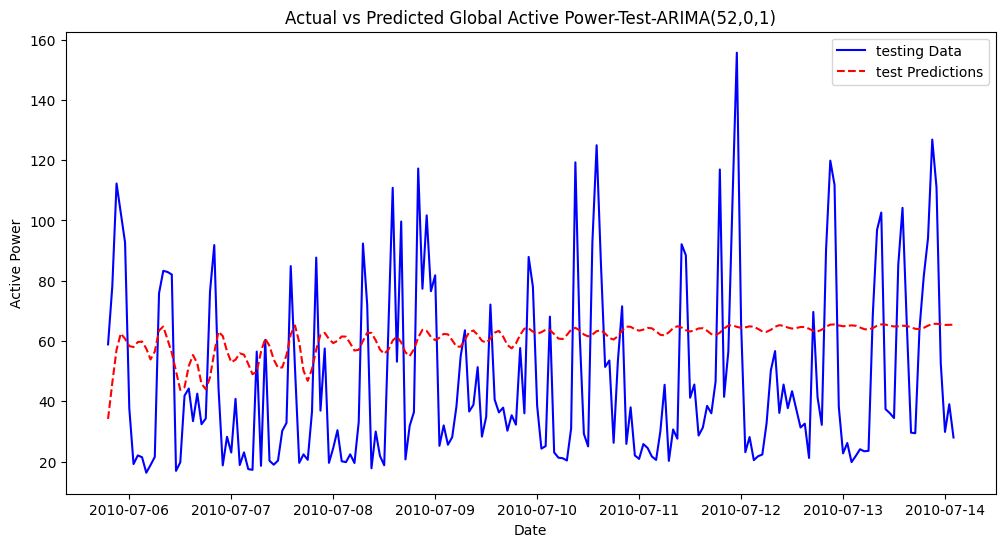

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data[:200], label='testing Data', color='blue') # testing data
plt.plot(test_preds[:200], label='test Predictions', color='red', linestyle='--') # test predictions
plt.title('Actual vs Predicted Global Active Power-Test-ARIMA(52,0,1)')
plt.xlabel('Date')
plt.ylabel('Active Power')
plt.legend()
plt.show()
